In [2]:
import numpy as np
import matplotlib.pyplot as plt
ratings = {
     'doky':{'Anne_with_an_E':5,'Strange_Things':3,'The_Escape':3},
     'steve':{'Anne_with_an_E':5,'Strange_Things':1,'The_Escape':4},
     'jamie':{'Anne_with_an_E':0,'Strange_Things':4,'The_Escape':5},
     'bobby':{'Anne_with_an_E':2,'Strange_Things':1,'The_Escape':5},
     'cookie':{'Anne_with_an_E':2,'Strange_Things':1}
}
names  = []
for name in ratings.keys():
    names.append(name)
similarity = [[0 for _ in range(len(names))] for _ in range(len(names))]
check = [[1 for _ in range(len(names))] for _ in range(len(names))]
def sim_msd(data, name1, name2):
    diff = 0
    count = 0
    for title in data[name1]:
        if title in data[name2]:
            #print('commonly watched movie ->', title)
            diff += pow(data[name1][title] - data[name2][title], 2)
            count += 1
    sim_msd = 1/( 1 + (diff/count) )
    #print('** msd similariy = ', sim_msd)
    return sim_msd
for i in range(len(names)):
    for j in range(len(names)):
        similarity[i][j] = sim_msd(ratings,names[i],names[j])
# for i in range(len(names)):
#     for j in range(len(names)):
#         print(similarity[i][j],end = " ")
#     print()
sim1 = np.array(similarity)
sim2 = np.array(similarity)
check1 = np.array(check)
check2 = np.array(check)
# for i in range(int(input())):
#     sim1 = sim1 @ sim2
#     check1 = check1 @ check2
#     print(sim1.sum()/check1.sum())

In [5]:
"""PageRank algorithm with explicit number of iterations.

Returns
-------
ranking of nodes (pages) in the adjacency matrix

"""
import numpy as np

def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank: The trillion dollar algorithm.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.ones(N) / N
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = v @ M_hat
    return v

M = np.array([[0, 0, 0, 0, 1],
              [0.5, 0, 0, 0, 0],
              [0.5, 0, 0, 0, 0],
              [0, 1, 0.5, 0, 0],
              [0, 0, 0.5, 1, 0]])
v = pagerank(M, 100, 0.85)
print(v)

[0.2 0.2 0.2 0.2 0.2]


In [6]:
import random
import numpy as np
eig = np.linalg.eig
n = int(input("사람 수를 입력하세요 : "))
m = int(input("평가할 상품의 개수를 입력하세요 : "))
score = [[random.randint(0,100)/100 for _ in range(m)] for _ in range(n)]
msd= [[0 for _ in range(n)] for _ in range(n)]
similarity = [[0 for _ in range(n)] for _ in range(n)]
for i in range(n):
    for j in range(m):
        print(score[i][j],end =" ")
    print()
for i in range(n):
    for j in range(n):
        if i==j:
            msd[i][j] = 0
            continue
        for k in range(m):
            msd[i][j] += pow(score[i][k]-score[j][k],2)
        msd[i][j] /= n
for i in range(n):
    for j in range(n):
        if i==j: continue
        similarity[i][j] = 1/(1+msd[i][j])
sim_mat = np.array(similarity)
print(sim_mat)
print(sum(sum(np.exp(sim_mat))))
np.exp(eig(sim_mat)[0])
print(sum(np.exp(eig(sim_mat)[0])))
print(((sum(sum(np.exp(sim_mat)))-sum(np.exp(eig(sim_mat)[0])))/sum(sum(np.exp(sim_mat)))))
#for i in range(n):
    #for j in range(n):
        #print("%.5f"%similarity[i][j],end=" ")
    #print()

사람 수를 입력하세요 : 4
평가할 상품의 개수를 입력하세요 : 4
0.09 0.66 0.26 0.81 
0.09 0.39 0.24 0.6 
0.71 0.41 0.42 0.94 
0.71 0.61 0.87 0.45 
[[0.         0.97148686 0.89098766 0.81823017]
 [0.97148686 0.         0.88245676 0.82436833]
 [0.89098766 0.88245676 0.         0.89233927]
 [0.81823017 0.82436833 0.89233927 0.        ]]
32.96798617506773
15.276279413409537
0.5366329222449647


C:\Users\choid\AppData\Local\Temp\ipykernel_14812\475304018.py:80: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  HC = linkage(DIS_matrix, method='average', metric='euclidean')


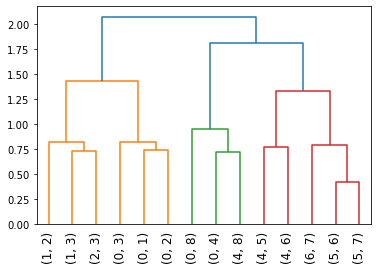

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


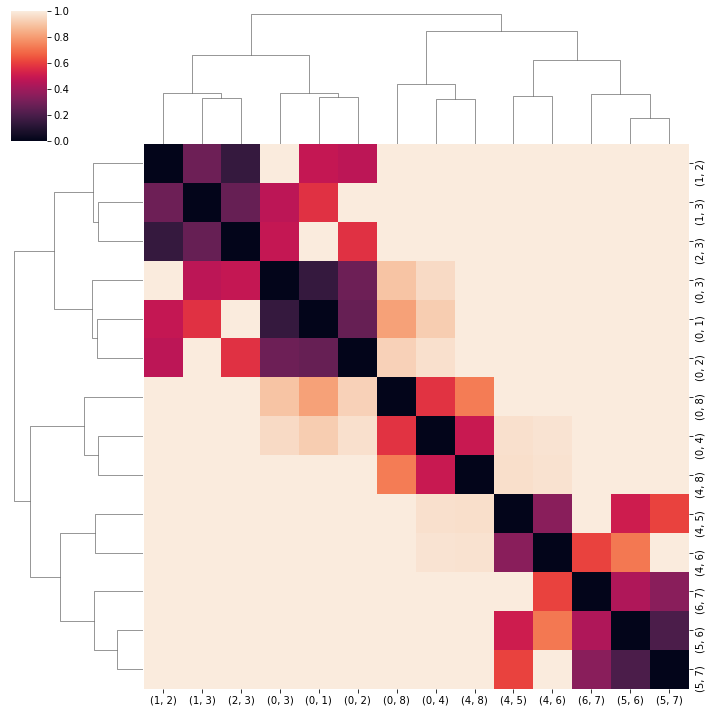

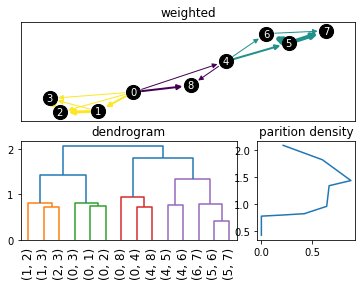

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist


""" Similarity 계산 함수 """
def CAL_s(g, i, j, style):
    s = 0
    if style == 'unweighted':
        a_i = np.array([1 if v in list(g[i]) else 0 for v in list(g.nodes())], dtype=float)
        a_i[i] = np.sum(a_i) / len(np.where(a_i != 0)[0])
        a_j = np.array([1 if v in list(g[j]) else 0 for v in list(g.nodes())], dtype=float)
        a_j[j] = np.sum(a_j) / len(np.where(a_j != 0)[0])
        s = np.sum(a_i * a_j) / (np.sum(a_i * a_i) + np.sum(a_j * a_j) - np.sum(a_i * a_j))
    elif style == 'weighted':
        a_i = np.array([g[i][v]['weight'] if v in list(g[i]) else 0 for v in list(g.nodes())], dtype=float)
        a_i[i] = np.sum(a_i) / len(np.where(a_i != 0)[0])
        a_j = np.array([g[j][v]['weight'] if v in list(g[j]) else 0 for v in list(g.nodes())], dtype=float)
        a_j[j] = np.sum(a_j) / len(np.where(a_j != 0)[0])
        s = np.sum(a_i * a_j) / (np.sum(a_i * a_i) + np.sum(a_j * a_j) - np.sum(a_i * a_j))
    else:
        print("check spell of style")
    return s


if __name__ == '__main__':
    
    """ Sample Graph(weighted) """
    G = nx.Graph()
    """ Add Nodes """
    node_num = 9
    G.add_nodes_from(range(node_num))
    """" Community """
    C_A = [0, 1, 2, 3]
    C_B = [0, 4, 8]
    C_C = [4, 5, 6, 7]
    """ ADD Edges """
    # Edge (i, j, w) 는 i-j Edge의 Weight이 w임을 표현
    L_A = []    # A 커뮤니티 내 Edge는 전결합, Weight는 1~4의 랜덤값 대입
    for node_i in C_A:
        for node_j in C_A:
            if node_j > node_i:
                new_edge = (node_i, node_j, np.random.randint(1, 4))
                L_A = L_A + [new_edge]
    L_B = [(0, 4, 1), (0, 8, 2), (4, 8, 1)]
    L_C = [(4, 5, 2), (4, 6, 1), (5, 6, 5), (5, 7, 4), (6, 7, 1)]
    G.add_weighted_edges_from(L_A)
    G.add_weighted_edges_from(L_B)
    G.add_weighted_edges_from(L_C)
    
    
    """ All_edge List"""
    all_edges = list(G.edges())
    all_edges.sort()
    
    
    """ Make Dissimilarity matrix(S, DIS) """
    S_matrix = np.zeros((len(all_edges), len(all_edges)))
    row = 0
    style = 'weighted'  # style: weighted, unweighted
    for (n1, n2) in all_edges:
        column = 0
        for (n3, n4) in all_edges:
            inter = {n1, n2} & {n3, n4}
            if len(inter) == 1:
                pool = list({n1, n2, n3, n4} - inter)
                S_matrix[row][column] = CAL_s(g=G, i=pool[0], j=pool[1], style=style)    # style: weighted, unweighted
            elif len(inter) == 2:
                S_matrix[row][column] = 1.0
            column = column + 1
        row = row + 1
    
    
    """ Clustering(average) """
    DIS_matrix = 1 - S_matrix
    HC = linkage(DIS_matrix, method='average', metric='euclidean')
    
    
    """ Hierachical Clustering Dendrogram 가시화 """
    fig = plt.figure()
    dn = dendrogram(Z=HC, labels=all_edges, leaf_rotation=90)
    plt.show(block=False)
    pd_DIS_matrix = pd.DataFrame(data=DIS_matrix, index=all_edges, columns=all_edges)
    sns.clustermap(pd_DIS_matrix)
    plt.show(block=False)
    
    
    """ Height """
    Heights_array = HC[:, 2]
    """ Clustering by Height"""
    H_list = Heights_array.tolist()
    D_sum_list = []
    Best_C = []
    Best_D = 0
    Best_H = 0
    for Height in Heights_array:
        step = np.array(HC[np.where(HC[:, 2] <= Height)][:, :2], dtype=int)
        C_edges = [[i] for i in all_edges]
        C_list = [[i] for i in all_edges]
        for [i, j] in step:
            C_edges.remove(C_list[i])
            C_edges.remove(C_list[j])
            C_edges = C_edges + [C_list[i] + C_list[j]]
            C_list = C_list + [C_list[i] + C_list[j]]
    
        """ CAL Partition density(D) """
        D_list = []
        for edges in C_edges:
            m = len(edges)
            n_pool = set(sum(edges, ()))
            n = len(n_pool)
            if n > 2:
                D = 2 * m * (m - n + 1) / (n-2) / (n-1)
            else:
                D = 0
            D_list = D_list + [D]
    
        D_sum = sum(D_list) / len(all_edges)
        D_sum_list = D_sum_list + [D_sum]
    
        if D_sum > Best_D:
            Best_C = C_edges
            Best_D = D_sum
            Best_H = Height
    
    
    """ Clustering When Best Height in Hierachical Clustering """
    Height = Best_H
    step = np.array(HC[np.where(HC[:, 2] <= Height)][:, :2], dtype=int)
    C_edges = [[i] for i in all_edges]
    C_list = [[i] for i in all_edges]
    for [i, j] in step:
        C_edges.remove(C_list[i])
        C_edges.remove(C_list[j])
        C_edges = C_edges + [C_list[i] + C_list[j]]
        C_list = C_list + [C_list[i] + C_list[j]]
    color_list = range(len(C_edges))
    group_num = 0
    for edge_group in C_edges:
        for edge in edge_group:
            G[edge[0]][edge[1]]['color'] = group_num
        group_num = group_num + 1
    
    
    """ 가시화 """
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 1, 1)
    pos = nx.fruchterman_reingold_layout(G)
    edges = G.edges()
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color="black")
    weights = np.array([G[u][v]['weight'] for u, v in edges])
    # weights = 2
    colors = [G[u][v]['color'] for u, v in edges]
    nx.draw_networkx_edges(G, pos, width=weights, edge_color=colors, arrows=True)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="white")
    plt.xticks([])
    plt.yticks([])
    plt.title(style)
    ax2 = fig.add_subplot(2, 3, (4, 5))
    dn = dendrogram(Z=HC, labels=all_edges, leaf_rotation=90, color_threshold=Height)
    plt.title('dendrogram')
    ax3 = fig.add_subplot(2, 3, 6)
    plt.plot(D_sum_list, H_list)
    plt.title('parition density')
    plt.show(block=False)

In [11]:
print('end')

end
